# **Implementasi Metode Statistik Orde Pertama dan *Learning Vector Quantizatio*n (LVQ) Untuk Mengidentifikasi Kualitas Biji Kopi Jawa Melalui Pengaruh Roasting**

In [1]:
import io
import os
import cv2
import sys
import time
import random
import tkinter
import numpy.random
import customtkinter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

numpy.random.seed(0)

from os import listdir
from skimage import io
from curses import window
from threading import Thread
from PIL import Image, ImageTk
from tkinter import ttk, filedialog
# from tkinter.filedialog import askopenfile
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

In [2]:
levels = ['DatasetGelap', 'DatasetTerang']
path = "TA-18-051-Dataset"
data_dir = os.path.join(path)
print(data_dir)

data = []
for id, level in enumerate(levels):
    for file in os.listdir(os.path.join(data_dir, level)):
        data.append(['{}/{}'.format(level, file), level])

data = pd.DataFrame(data, columns = ['image_file', 'label'])
data['path'] = path + '/' + data['image_file']
data['label'] = data['label'].map({'DatasetGelap': 'Gelap', 'DatasetTerang': 'Terang'})
data.head()

TA-18-051-Dataset


,image_file,label,path
0,DatasetGelap/DG1.jpg,Gelap,TA-18-051-Dataset/DatasetGelap/DG1.jpg
1,DatasetGelap/DG10.jpg,Gelap,TA-18-051-Dataset/DatasetGelap/DG10.jpg
2,DatasetGelap/DG11.jpg,Gelap,TA-18-051-Dataset/DatasetGelap/DG11.jpg
3,DatasetGelap/DG12.jpg,Gelap,TA-18-051-Dataset/DatasetGelap/DG12.jpg
4,DatasetGelap/DG13.jpg,Gelap,TA-18-051-Dataset/DatasetGelap/DG13.jpg


In [3]:
data['image'] = data['path'].map(lambda x: np.asarray(Image.open(x)))
data.head()

,image_file,label,path,image
0,DatasetGelap/DG1.jpg,Gelap,TA-18-051-Dataset/DatasetGelap/DG1.jpg,"[[[168, 167, 162], [168, 167, 162], [166, 165,..."
1,DatasetGelap/DG10.jpg,Gelap,TA-18-051-Dataset/DatasetGelap/DG10.jpg,"[[[165, 165, 163], [170, 170, 168], [173, 173,..."
2,DatasetGelap/DG11.jpg,Gelap,TA-18-051-Dataset/DatasetGelap/DG11.jpg,"[[[163, 160, 155], [160, 157, 152], [161, 158,..."
3,DatasetGelap/DG12.jpg,Gelap,TA-18-051-Dataset/DatasetGelap/DG12.jpg,"[[[165, 162, 157], [163, 160, 155], [163, 160,..."
4,DatasetGelap/DG13.jpg,Gelap,TA-18-051-Dataset/DatasetGelap/DG13.jpg,"[[[163, 163, 161], [169, 169, 167], [163, 163,..."


In [4]:
all_data = []

for i in range(len(data)):
    image = cv2.imread(data['path'][i])
    image = cv2.resize(image, (250, 250))
    label = 0 if data['label'][i] == 'Gelap' else 1
    all_data.append([image, label])

In [5]:
x = []
y = []

for image, label in all_data:
    x.append(image)
    y.append(label)

x = np.array(x)
y = np.array(y)

In [6]:
def map_data(folder_dir):
  df = pd.DataFrame()
  label = []
  data_image = []
  data = []
  for folder in folder_dir:
    print(folder)
    for images in os.listdir(folder):
      if images.endswith('.jpg'):
        data_image.append(folder+images)
        image = cv2.imread(folder+images)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        data.append(image)
        if folder[-2] == 'p':
          label.append(0)
        elif folder[-2] == 'g':
          label.append(1)
        else:
          label.append(1)
  df['image'] = data_image
  df['label'] = label
  df['data'] = data
  return df

In [ ]:
folder_dir = [data_dir + "/DatasetGelap/", data_dir + "/DatasetTerang/"]
df_images = map_data(folder_dir)
df_images

### ***Pre-processing***

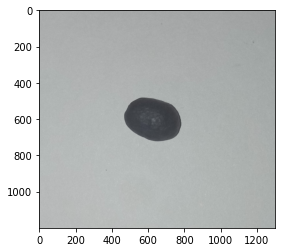

In [8]:
sampel = cv2.imread("TA-18-051-Dataset/DatasetGelap/DG10.jpg")
plt.imshow(sampel)
plt.show()

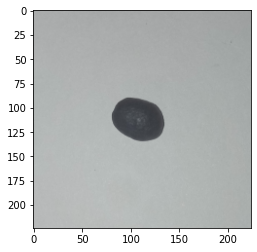

In [9]:
resized = cv2.resize(sampel, (224, 224), interpolation = cv2.INTER_AREA)
plt.imshow(resized)

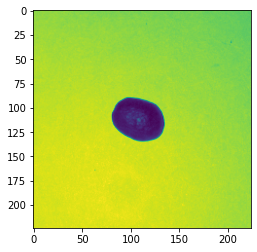

In [10]:
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

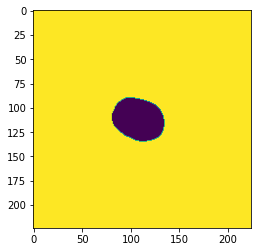

In [11]:
t = 80
maxvalue = 255
th, dst = cv2.threshold(gray, t, maxvalue, cv2.THRESH_OTSU)
plt.imshow(dst)

In [12]:
def stats(data_dir):
    mean = []
    std = []
    var = []
    y = []
    for level in data_dir:
        for images in os.listdir(level):
            if images.endswith('.jpg'):
                image = cv2.imread(level+images)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                mean_temp = np.mean(image)
                std_temp = np.std(image)
                var_temp = np.var(image)
                mean.append(mean_temp)
                std.append(std_temp)
                var.append(var_temp)
                if level[-2] == 'p':
                    y.append(0)
                elif level[-2] == 'g':
                    y.append(1)
                else:
                    y.append(1)
    return mean, std, var, y

### **Ekstraksi Ciri Statistik Orde Pertama**

In [ ]:
def preprocessing(df):
  mean = []
  std = []
  var = []
  t = 80
  maxvalue = 255
  for i in range(len(df['image'])):
    image = cv2.resize(df.iloc[i, 2], (250, 250), interpolation = cv2.INTER_AREA)
    th, dst = cv2.threshold(image, t, maxvalue, cv2.THRESH_OTSU)
    mean_temp = np.mean(df.iloc[i, 2])
    std_temp = np.std(df.iloc[i, 2])
    var_temp = np.var(df.iloc[i, 2])
    mean.append(mean_temp)
    std.append(std_temp)
    var.append(var_temp)
  return mean, std, var

mean, std, var = preprocessing(df_images)
df_images['mean'] = mean
df_images['std'] = std
df_images['var'] = var
df_images

In [14]:
X = df_images[['mean', 'std', 'var']]
X

,mean,std,var
0,168.567957,23.269836,541.485245
1,173.632889,21.490806,461.854726
2,160.656776,24.323203,591.618215
3,160.093642,25.655307,658.194783
4,165.219074,22.000977,484.043000
...,...,...,...
75,169.372958,29.278817,857.249112
76,159.642658,27.244820,742.280196
77,168.191607,25.069889,628.499332
78,160.603099,24.876960,618.863132


In [15]:
y = df_images[['label']]
y

,label
0,0
1,0
2,0
3,0
4,0
...,...
75,1
76,1
77,1
78,1


### **Training & Testing Model Statistik Orde Pertama**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
X_train

,mean,std,var
33,168.664946,24.334662,592.175753
53,160.551983,20.750739,430.593153
28,154.672116,32.695616,1069.003313
11,168.619856,23.829312,567.836096
57,155.737202,30.525793,931.824032
23,156.751045,37.823166,1430.591858
10,168.582740,19.452627,378.404693
31,158.377463,35.015746,1226.102448
43,159.360731,23.173923,537.030706
61,157.134005,37.291909,1390.686501


In [17]:
X_test

,mean,std,var
50,165.585678,23.989003,575.472262
27,154.081774,35.079156,1230.547155
30,155.165820,32.843830,1078.717193
77,168.191607,25.069889,628.499332
45,166.753188,22.051435,486.265764
71,156.940420,33.680660,1134.386847
66,158.322368,35.578637,1265.839389
68,158.902404,29.580420,875.001262
48,169.434057,25.742978,662.700893
69,156.372320,36.690736,1346.210082


### ***Confusion Matrix***

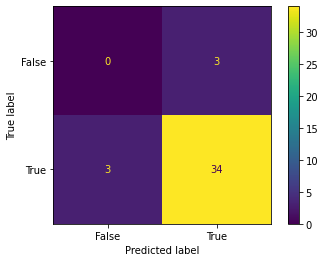

In [18]:
from sklearn.metrics import confusion_matrix

actual = numpy.random.binomial(1,.9,size = 40)
predicted = numpy.random.binomial(1,.9,size = 40)

confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### **Training Model *Learning Vector Quantization***

In [19]:
n_input = X_train.shape[1]
n_output = len(np.unique(y_train))
print('Input Neuron:', n_input)
print('Output Neuron:', n_output)

Input Neuron: 3
Output Neuron: 2


In [20]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [21]:
class LVQ(object):
    def __init__(self, sizeInput, sizeOutput, max_epoch, alpha=np.random.random(), threshold=np.random.random(), version='1'):
        self.sizeInput = sizeInput
        self.sizeOutput = sizeOutput
        self.max_epoch = max_epoch
        self.alpha = alpha
        self.threshold = threshold
        self.version = version
        self.weight = np.zeros((sizeOutput, sizeInput))
    
    def getWeight(self):
        return self.weight
    
    def train(self, train_data, train_target):
        weight_label, label_index = np.unique(train_target, True)
        self.weight = train_data[label_index].astype(np.float)
        train_data = np.delete(train_data, label_index, axis=0)
        train_target = np.delete(train_target, label_index, axis=0)

        epoch = 0
        iterasi = 0
        while epoch <= self.max_epoch:
            epoch += 1
            for data, target in zip(train_data, train_target):
                iterasi += 1
                distance = np.sqrt(np.sum((data - self.weight) ** 2, axis=1))
                idx_min = np.argmin(distance)
                idx_sort = np.argsort(distance)
                idx_winner, idx_runnerUp = idx_sort[0], idx_sort[1]
                min_distance = min(distance[idx_winner]/distance[idx_runnerUp], distance[idx_runnerUp]/distance[idx_winner])
                max_distance = max(distance[idx_winner]/distance[idx_runnerUp], distance[idx_runnerUp]/distance[idx_winner])
            else:
                if target == weight_label[idx_min]:
                    self.weight[idx_min] = self.weight[idx_min] + self.alpha * (data - self.weight[idx_min])
                else:
                    self.weight[idx_min] = self.weight[idx_min] + self.alpha * (data - self.weight[idx_min])
            
            self.alpha = self.alpha * (1 - epoch / self.max_epoch)

        weight_class = (self.weight, weight_label)
        return weight_class
    
    def test(self, test_data, weight_class):
        weight, label = weight_class
        output = []
        for data in test_data:
            distance = np.sqrt(np.sum((data - self.weight) ** 2, axis=1))
            idx_min = np.argmin(distance)
            output.append(label[idx_min])
        return output

lvq = LVQ(sizeInput=n_input, sizeOutput=n_output, max_epoch=10, alpha=0.0001, version='1')
bobot_dan_label = lvq.train(X_train, y_train)
bobot = lvq.getWeight()
print('Bobot : ', bobot)
print('Ukuran Bobot : ', bobot.shape)

y_pred = lvq.test(X_test, bobot_dan_label)
print('Precision : ', precision_score(y_test, y_pred))
print('Recall : ', recall_score(y_test, y_pred))
print('Accuracy : ', precision_score(y_test, y_pred))
print('F1 Score : ', f1_score(y_test, y_pred))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_980\4155665068.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.weight = train_data[label_index].astype(np.float)


Bobot :  [[168.6644374   24.33595344 592.24318873]
 [160.55198269  20.75073861 430.59315293]]
Ukuran Bobot :  (2, 3)
Precision :  0.5
Recall :  0.125
Accuracy :  0.5
F1 Score :  0.2


C:/Users/lenovo/Downloads/IFA 500 - Tugas Akhir/TA-18-051-Resize/Test/DG19.png


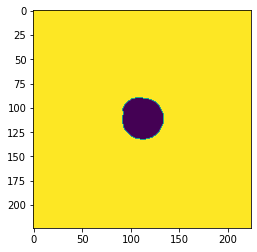

In [25]:
customtkinter.set_appearance_mode("System")
customtkinter.set_default_color_theme("blue")
file_path = None

app = customtkinter.CTk()
app.geometry("800x600")

# text_var = tkinter.StringVar(value="CTkLabel")
image = cv2.cvtColor(cv2.imread("placeholder.png"), cv2.COLOR_BGR2RGB)
image = Image.fromarray(image)
image = ImageTk.PhotoImage(image, master = app)
label = tkinter.Label(master=app,
                      image = image,
                      width=350,
                      height=350,
                      fg_color=("white", "gray75"),
                      corner_radius=8)
label.place(relx=0.25, rely=0.35, anchor=tkinter.CENTER)

text_var1 = tkinter.StringVar(value="CTkLabel")
label1 = customtkinter.CTkLabel(master=app,
                               textvariable=text_var1,
                               width=350,
                               height=350,
                               fg_color=("white", "gray75"),
                               corner_radius=8)
label1.place(relx=0.75, rely=0.35, anchor=tkinter.CENTER)

def open_file():
    file_path = filedialog.askopenfilename()
    print (file_path)
    resized = cv2.resize(cv2.imread(file_path), (224, 224), interpolation = cv2.INTER_AREA)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    t = 80
    maxvalue = 255
    th, dst = cv2.threshold(gray, t, maxvalue, cv2.THRESH_OTSU)
    plt.imshow(dst)
    plt.show()
    image = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    image = ImageTk.PhotoImage(image, master = app)
    label = tkinter.Label(master=app,
                      image = image,
                      width=350,
                      height=350)
    label.image = image
    label.place(relx=0.25, rely=0.35, anchor=tkinter.CENTER)
    # coding identifikasi layak dan tidak layak

button = customtkinter.CTkButton(master=app,
                                 width=350,
                                 height=60,
                                 border_width=0,
                                 corner_radius=8,
                                 text="Proses Citra",
                                 command=open_file)
button.place(relx=0.25, rely=0.75, anchor=tkinter.CENTER)

app.mainloop()

customtkinter.set_appearance_mode("System")
customtkinter.set_default_color_theme("blue")
file_path = None

app = customtkinter.CTk()
app.geometry("800x600")

text_var = tkinter.StringVar(value="CTkLabel")
label = customtkinter.CTkLabel(master=app,
                               textvariable=text_var,
                               width=350,
                               height=350,
                               fg_color=("white", "gray75"),
                               corner_radius=8)
label.place(relx=0.25, rely=0.35, anchor=tkinter.CENTER)

text_var1 = tkinter.StringVar(value="CTkLabel")
label1 = customtkinter.CTkLabel(master=app,
                               textvariable=text_var1,
                               width=350,
                               height=350,
                               fg_color=("white", "gray75"),
                               corner_radius=8)
label1.place(relx=0.75, rely=0.35, anchor=tkinter.CENTER)

def open_file():
    file_path = askopenfile(mode='r', filetypes=[('Image Files', '*jpg')])
    resized = cv2.resize(file_path, (224, 224), interpolation = cv2.INTER_AREA)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    t = 80
    maxvalue = 255
    th, dst = cv2.threshold(gray, t, maxvalue, cv2.THRESH_OTSU)
    image = Image.fromarray(dst)
    image = ImageTk.PhotoImage(image)
    label.image = image
    if file_path is not None:
        pass

button = customtkinter.CTkButton(master=app,
                                 width=350,
                                 height=60,
                                 border_width=0,
                                 corner_radius=8,
                                 text="Proses Citra",
                                 command=open_file)
button.place(relx=0.25, rely=0.75, anchor=tkinter.CENTER)

app.mainloop()